# 1. Libraries and Packages

In [1]:
# import general packages - numpy,pandas,seaborn,matplotlib
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set

# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# 2. Import Cleaned Dataset

In [2]:
#Import the data set
traindata = pd.read_csv('cleaned_data.csv')
traindata.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85,0,0,1,4,1,186.21,29.0,1,1


# 3. Model 3: K-Nearest Neighbour Model 

###  Step 1: Separate predictors and responses

In [3]:
#splitting the data into input data features and target 
predictors = traindata.drop('stroke',axis=1)
stroke = traindata['stroke']

### Step 2: Split the dataset into training and testing datasets in 8:2 ratio 

In [4]:
# Split the Dataset into Train and Test
stroke_train, stroke_test, predictors_train, predictors_test = train_test_split(stroke, predictors, test_size = 0.2, random_state = 42)

### Step 4: Putting data into KNN Model  

In [5]:
# Create a KNN classifier with k=1 since it leads to the lowest error rate
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier on the training data
knn.fit(predictors_train, stroke_train)

# Use the trained model to make predictions on the testing data
stroke_pred = knn.predict(predictors_test)


# Evaluate the accuracy of the model
accuracy = accuracy_score(stroke_test, stroke_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8107711138310894


### Step 5: Compute the accuracy of the model

              precision    recall  f1-score   support

           0    0.93437   0.66609   0.77775      4061
           1    0.74294   0.95376   0.83525      4109

    accuracy                        0.81077      8170
   macro avg    0.83865   0.80993   0.80650      8170
weighted avg    0.83809   0.81077   0.80667      8170



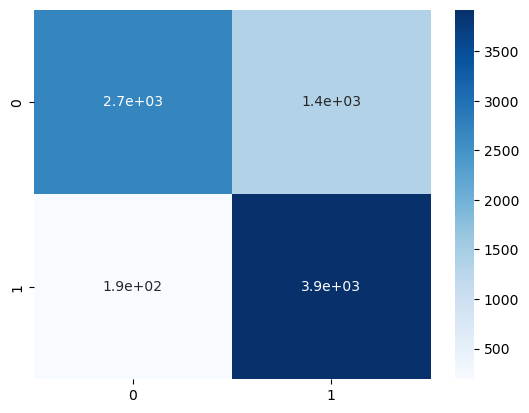

In [6]:
cm = confusion_matrix(stroke_test, stroke_pred)
sb.heatmap(cm, annot=True, cmap='Blues')

# Create a classification report
cr = classification_report(stroke_test, stroke_pred, digits=5)
print(cr)

# 4. Optimisation of KNN Model

It is important to find the optimal K-value for a KNN model because the value of K affects the performance of the model. A larger K value means that the model considers more neighbors, which can lead to smoother decision boundaries and less sensitivity to noise, but may also result in less accurate predictions due to overgeneralization. A smaller K value, on the other hand, means that the model is more sensitive to the local structure of the data, but may also result in overfitting and poor performance on unseen data.

Therefore, selecting the optimal K-value is a trade-off between model complexity and performance. The optimal K-value should be chosen in such a way that it balances between underfitting and overfitting. To determine the optimal K-value for a given dataset, we typically use cross-validation techniques, such as k-fold cross-validation, to evaluate the performance of the model for different values of K. We then select the K-value that gives the best performance on the validation set.

### Step 1: Find the optimal k-value to optmise the KNN model

In [7]:
#Create a list that will store the average error rate value produced by different k-value
error_rate=[]

#Test k-value from 1 to 31
for i in range (1,31):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(predictors_train,stroke_train)
    stroke_prediction=knn.predict(predictors_test)
    error_rate.append(np.mean(stroke_prediction!=stroke_test))

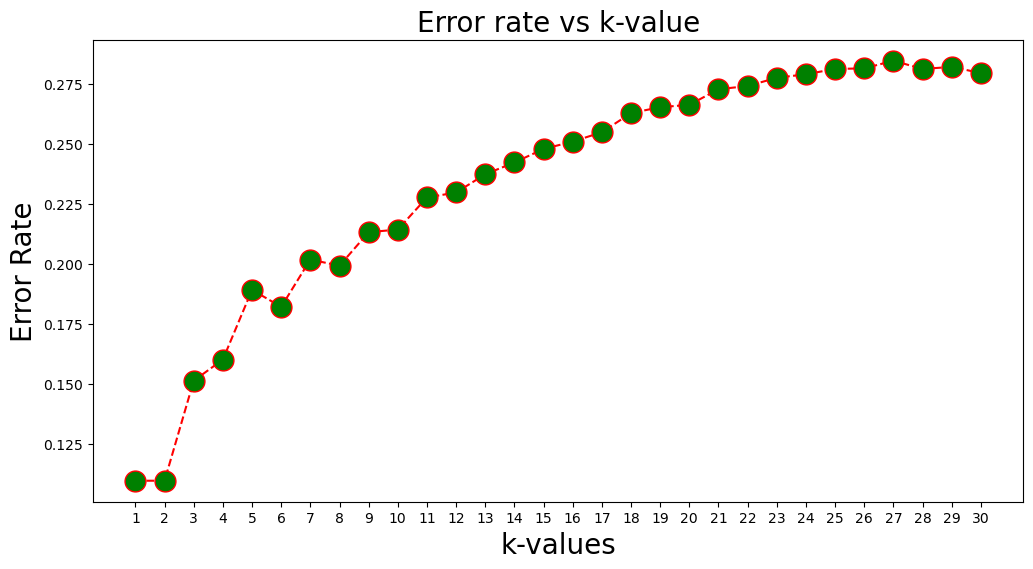

In [8]:
#Plot a graph of error rate vs k-value

plt.figure(figsize=(12,6))
plt.plot(range(1,31),error_rate,marker="o",markerfacecolor="green",
     linestyle="dashed",color="red",markersize=15)
plt.title("Error rate vs k-value",fontsize=20)
plt.xlabel("k-values",fontsize=20)
plt.ylabel("Error Rate",fontsize=20)
plt.xticks(range(1,31))
plt.show()

### Step 2: Change the k-value to 2 since it leads to the lowest error rate 

In [9]:
# Create a KNN classifier with k=1 since it leads to the lowest error rate
knn = KNeighborsClassifier(n_neighbors=2)

# Train the KNN classifier on the training data
knn.fit(predictors_train, stroke_train)

# Use the trained model to make predictions on the testing data
stroke_pred = knn.predict(predictors_test)


# Evaluate the accuracy of the model
accuracy = accuracy_score(stroke_test, stroke_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8902080783353733


### Step 3: Recompute the accuracy of the optimised model

              precision    recall  f1-score   support

           0    0.92299   0.85004   0.88501      4061
           1    0.86253   0.92991   0.89495      4109

    accuracy                        0.89021      8170
   macro avg    0.89276   0.88997   0.88998      8170
weighted avg    0.89258   0.89021   0.89001      8170



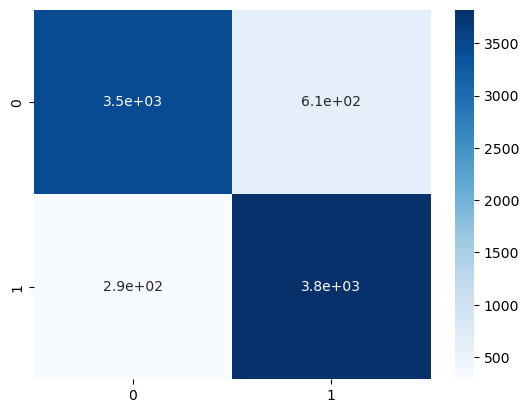

In [10]:
cm = confusion_matrix(stroke_test, stroke_pred)
sb.heatmap(cm, annot=True, cmap='Blues')

# Create a classification report
cr = classification_report(stroke_test, stroke_pred, digits = 5)
print(cr)